In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [35]:
df = pd.read_csv('../data/train.csv')

/home/muxail/.cache/pypoetry/virtualenvs/raifhack-ds-2021-rVtTtMQz-py3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [36]:
pd.merge(
    df.groupby('region')['price_type'].mean().reset_index(),
    df['region'].value_counts().reset_index().rename(columns={'index': 'region', 'region': 'n_rows'}),
    on=['region'],
    how='inner'
)

region  price_type  n_rows
0                    Адыгея    0.000000     539
1                     Алтай    0.029412      34
2            Алтайский край    0.016219    3391
3              Башкортостан    0.008755    7767
4      Белгородская область    0.043720    2699
5          Брянская область    0.072490    1683
6     Волгоградская область    0.002327    3867
7       Вологодская область    0.008865    1692
8       Воронежская область    0.004716    4665
9        Ивановская область    0.029692    1886
10        Иркутская область    0.114849    3953
11  Калининградская область    0.020071    3637
12        Калужская область    0.075229    1635
13                  Карелия    0.186791     969
14      Кемеровская область    0.059674    4290
15        Кировская область    0.009782    2249
16                     Коми    0.027561    1669
17      Костромская область    0.009213    1194
18       Краснодарский край    0.001549   23242
19        Красноярский край    0.113316    5242
20          Курская область    0.120461    1129
21    Ленинградская область    0.020187    2675
22         Липецкая область    0.013080    1529
23                 Мордовия    0.005889     849
24                   Москва    0.001626   55962
25       Московская область    0.001225   16328
26    Нижегородская область    0.025246    6813
27    Новосибирская область    0.017331    7674
28           Омская область    0.036064    2551
29        Орловская область    0.097928    1062
30       Пензенская область    0.004578    1966
31            Пермский край    0.015002    5466
32          Приморский край    0.118881     429
33       Ростовская область    0.003949    8357
34        Самарская область    0.007011    8843
35          Санкт-Петербург    0.018848   18888
36      Саратовская область    0.013858    4546
37     Свердловская область    0.016820   12485
38       Смоленская область    0.027948    1467
39      Ставропольский край    0.000175    5708
40                Татарстан    0.002979    9064
41          Томская область    0.150956    1517
42         Тульская область    0.005917    2366
43        Тюменская область    0.007138    6725
44                 Удмуртия    0.011711    2647
45      Ульяновская область    0.004511    1995
46      Ханты-Мансийский АО    0.019054    3044
47      Челябинская область    0.006150    9106
48      Ярославская область    0.010444    2298

In [37]:
df['price_type'].mean()

0.016058357637101846

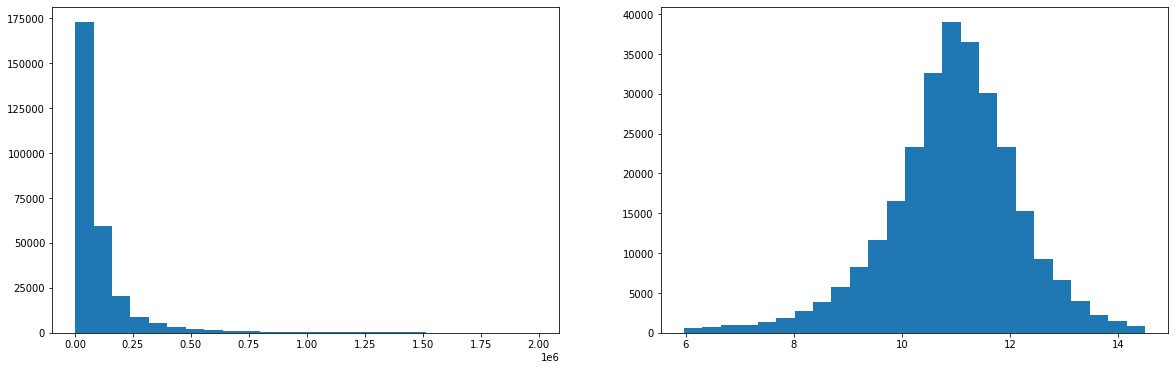

In [44]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.hist(df['per_square_meter_price'].values, bins=25);
plt.subplot(1,2,2)
plt.hist(np.log(df['per_square_meter_price'].values), bins=25);

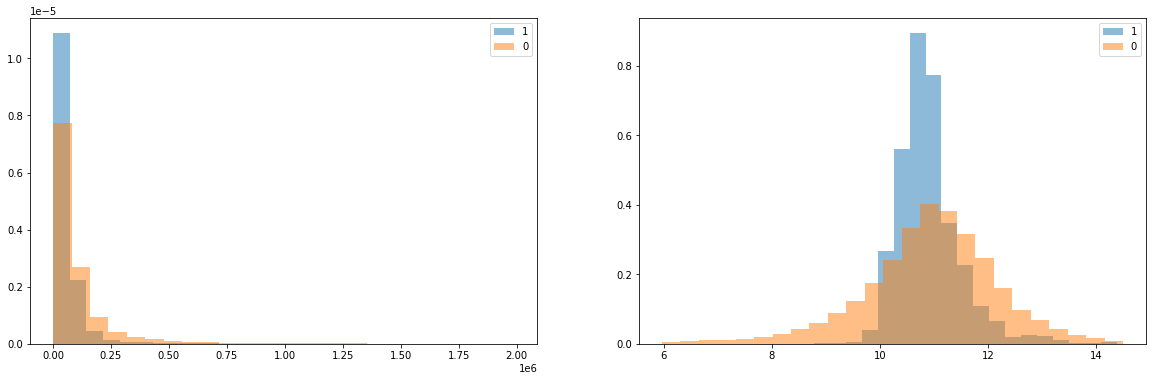

In [52]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.hist(
    df.loc[df['price_type'] == 1, 'per_square_meter_price'].values, 
    bins=25, 
    density=True, 
    alpha=0.5, 
    label='1'
);
plt.hist(
    df.loc[df['price_type'] == 0, 'per_square_meter_price'].values, 
    bins=25, 
    density=True, 
    alpha=0.5, 
    label='0'
);
plt.legend()

plt.subplot(1,2,2)
plt.hist(
    np.log(df.loc[df['price_type'] == 1, 'per_square_meter_price'].values), 
    bins=25, 
    density=True, 
    alpha=0.5, 
    label='1'
);
plt.hist(
    np.log(df.loc[df['price_type'] == 0, 'per_square_meter_price'].values), 
    bins=25, 
    density=True, 
    alpha=0.5, 
    label='0'
);
plt.legend()


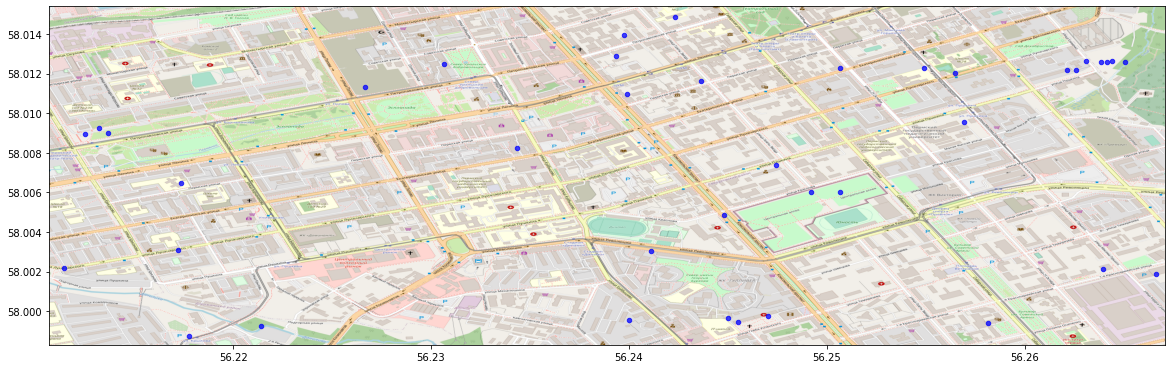

In [76]:
lats = [57.9983, 58.0154]
lons = [56.2107, 56.2671]

bbox = (*lons, *lats)

perm_coords = df[
    (df['region'] == 'Пермский край')
    & ((df['lat'] >= lats[0]) & (df['lat'] <= lats[1]))
    & ((df['lng'] >= lons[0]) & (df['lng'] <= lons[1]))
    & (df['price_type'] == 1)
]

perm = plt.imread('../map.png')
fig, ax = plt.subplots(figsize = (20,20))
ax.scatter(perm_coords.lng, perm_coords.lat, zorder=1, alpha= 0.75, c='b', s=20)
ax.set_xlim(bbox[0],bbox[1])
ax.set_ylim(bbox[2],bbox[3])
ax.imshow(perm, zorder=0, extent = bbox, aspect= 'equal')

plt.savefig('perm.png', dpi=300)

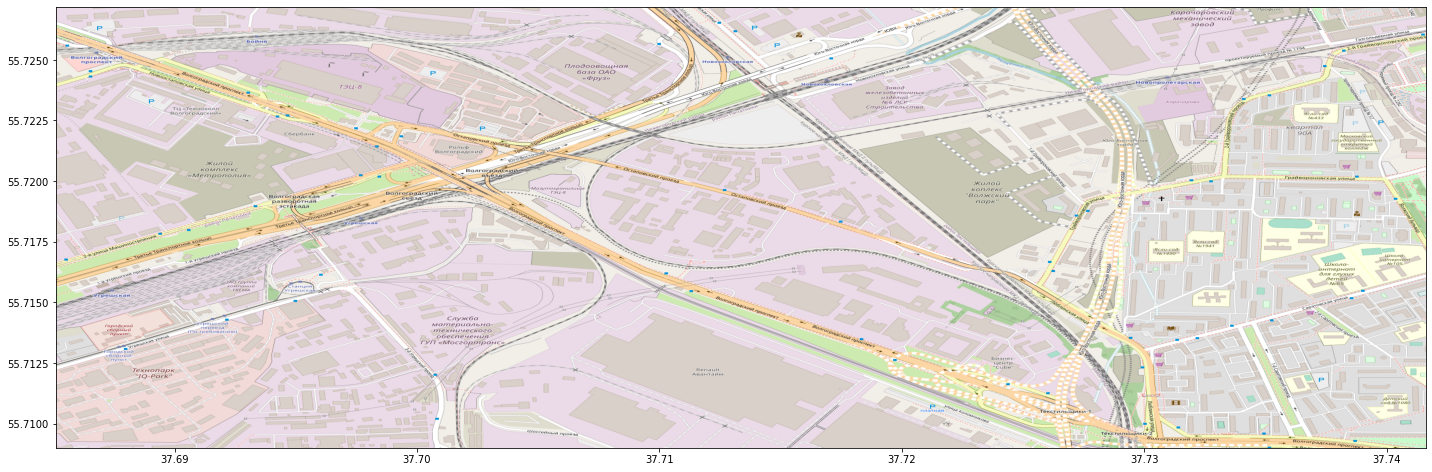

In [77]:
lats = [55.7090, 55.7272]
lons = [37.6851, 37.7416]

bbox = (*lons, *lats)

coords = df[
    (df['region'] == 'Москва')
    & ((df['lat'] >= lats[0]) & (df['lat'] <= lats[1]))
    & ((df['lng'] >= lons[0]) & (df['lng'] <= lons[1]))
    & (df['price_type'] == 1)
]

map_img = plt.imread('../map (3).png')
fig, ax = plt.subplots(figsize = (20,20))
ax.scatter(coords.lng, coords.lat, zorder=1, alpha= 0.75, c='b', s=20)
ax.set_xlim(bbox[0],bbox[1])
ax.set_ylim(bbox[2],bbox[3])
ax.imshow(map_img, zorder=0, extent = bbox, aspect= 'equal')

plt.tight_layout()
plt.savefig('moscow.png', dpi=300)

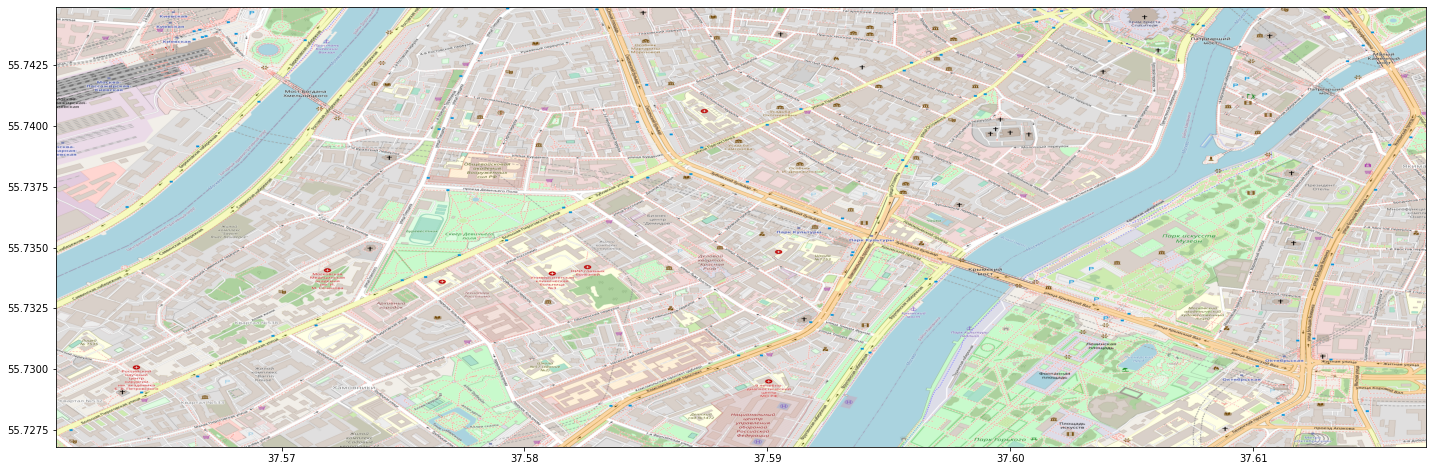

In [78]:
lats = [55.7268, 55.7449]
lons = [37.5607, 37.6171]

bbox = (*lons, *lats)

coords = df[
    (df['region'] == 'Москва')
    & ((df['lat'] >= lats[0]) & (df['lat'] <= lats[1]))
    & ((df['lng'] >= lons[0]) & (df['lng'] <= lons[1]))
    & (df['price_type'] == 1)
]

map_img = plt.imread('../map (4).png')
fig, ax = plt.subplots(figsize = (20,20))
ax.scatter(coords.lng, coords.lat, zorder=1, alpha= 0.75, c='b', s=20)
ax.set_xlim(bbox[0],bbox[1])
ax.set_ylim(bbox[2],bbox[3])
ax.imshow(map_img, zorder=0, extent = bbox, aspect= 'equal')

plt.tight_layout()
plt.savefig('moscow1.png', dpi=300)

In [90]:
df['date'] = pd.to_datetime(df['date'])

In [93]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [99]:
tmp = df.groupby(['region', 'month'])['per_square_meter_price'].median().reset_index()

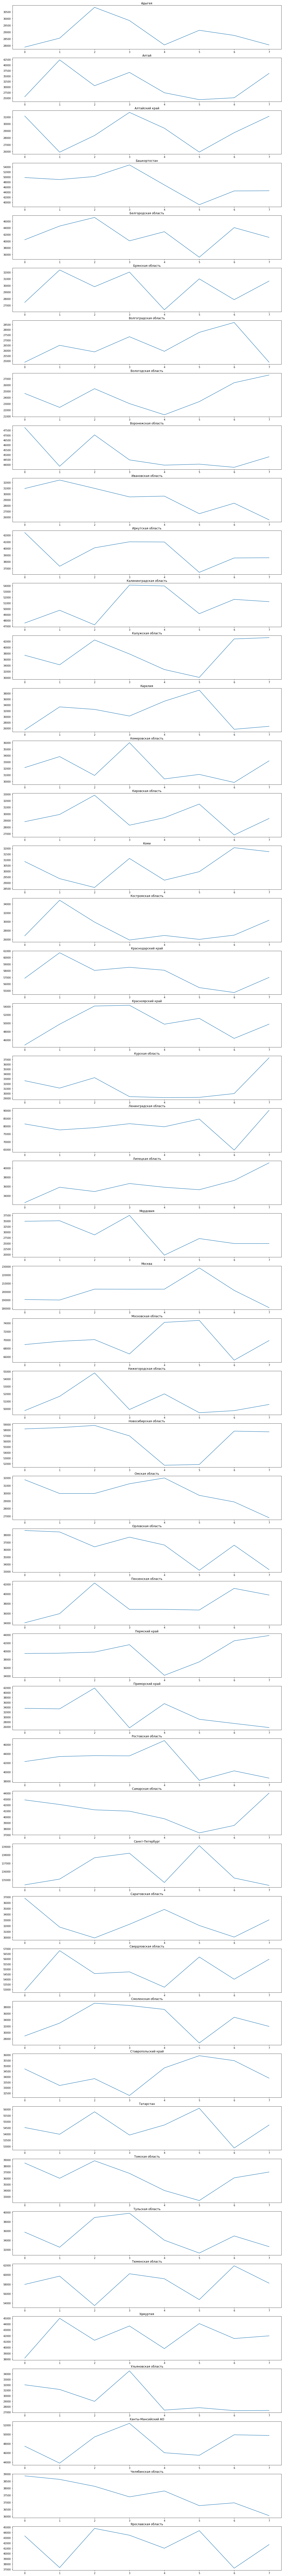

In [106]:
N = tmp['region'].nunique()

plt.figure(figsize=(20, 4 * N))

for n, region in enumerate(tmp['region'].unique()):
    p = tmp[tmp['region'] == region]['per_square_meter_price'].values
    plt.subplot(N, 1, n+1)
    plt.plot(p)
    plt.title(region)